In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Data Import

In [2]:
#Loading the datasets 
anime_data = pd.read_csv('C:\\Lessons\\Fa2022\\CS 512\\Project\\archive\\anime.csv')
user_data = pd.read_csv('C:\\Lessons\\Fa2022\\CS 512\\Project\\archive\\rating_complete.csv', low_memory=False)

In [3]:
# for anime, remove "Unkown" in score column
anime_data = anime_data[(anime_data["Score"] != "Unknown")]

In [4]:
# # 用 anime还是anime_id做index待决定
# def get_user_ids(anime):
#     return user_data[user_data['anime']==anime]['user_id'].values.tolist()

# # get_user_ids(0)

113.0


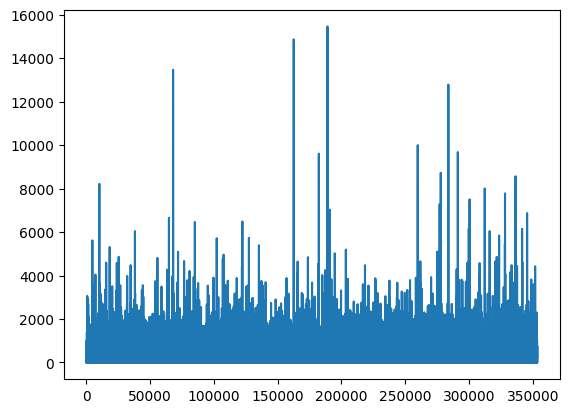

In [5]:
dict = {}
for user in user_data["user_id"]:
    dict[user] = dict.get(user,0)+1

lists = sorted(dict.items()) # sorted by key, return a list of tuples

x, y = zip(*lists) # unpack a list of pairs into two tuples

min_rate_num = np.median(y)
print(min_rate_num)
plt.plot(x, y)
plt.show()

In [6]:
# remove users rating anime less than median
ratings = user_data['user_id'].value_counts()
user_data=user_data[user_data['user_id'].isin(ratings[ratings >= 113].index)]
user_data.head()

,user_id,anime_id,rating
189,3,25835,8
190,3,28171,8
191,3,32282,8
192,3,35788,9
193,3,9253,9


In [7]:
# rearrange user_data and anime_data via unique user_id and anime_id
user_ids = user_data["user_id"].unique().tolist()
user2_encoded = {x: i for i, x in enumerate(user_ids)} # numbering each user
encoded2_user = {i: x for i, x in enumerate(user_ids)} # assigning the user to the number
user_data["user"] = user_data["user_id"].map(user2_encoded) # substituing the user values

anime_ids = user_data['anime_id'].unique().tolist()
anime2_encoded = {x: i for i, x in enumerate(anime_ids)}
encoded2_anime = {i: x for i, x in enumerate(anime_ids)}
user_data["anime"] = user_data["anime_id"].map(anime2_encoded)

user_data.head()

,user_id,anime_id,rating,user,anime
189,3,25835,8,0,0
190,3,28171,8,0,1
191,3,32282,8,0,2
192,3,35788,9,0,3
193,3,9253,9,0,4


In [8]:
# matrix factorization?
R_df = user_data.pivot(index = 'user_id', columns ='anime', values = 'rating').fillna(0)
R_df.head()

c:\Users\Windy\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\core\reshape\reshape.py:130: RuntimeWarning: overflow encountered in long_scalars
  num_cells = num_rows * num_columns


ValueError: negative dimensions are not allowed